<a href="https://colab.research.google.com/github/vzloy/facility/blob/main/facility_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Average Age: 8.13

Instrument ages each year:
      Instrument 1  Instrument 2  Instrument 3  Instrument 4  Instrument 5  \
Year                                                                         
2024            18            18             6            12             3   
2025             0             0             7            13             4   
2026             1             1             8             0             5   
2027             2             2             9             1             6   
2028             3             3            10             2             7   
2029             4             4            11             3             8   
2030             5             5             0             4             9   
2031             6             6             1             5            10   
2032             7             7             2             6            11   
2033             8             8             3             7            12   
2034      

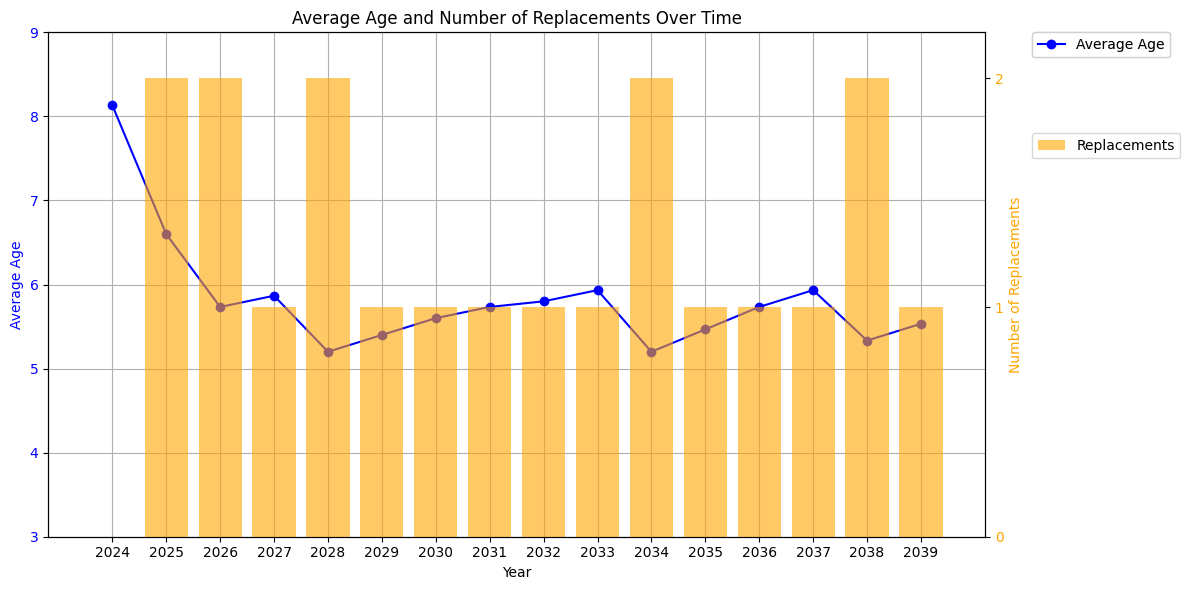

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

# Initial ages of the instruments
instruments = [18, 18, 6, 12, 3, 3, 10, 4, 7, 12, 0, 9, 8, 6, 6]

"""
XX3	18 r
XX4	18 r
XX6	6
XX1	12
XX2	3
XX3	3
XX1	10 r
XX1	4
XX1	7
XX1	12
XX1	0
XX3	9
XX4-X	8
XX5	6
XX6	6

"""

# Duration of the simulation in years
years = 15

# Start year
start_year = 2024

# Target average age for the instruments
target_average_age = 6


# Initial average age calculation
initial_average_age = sum(instruments) / len(instruments)
print(f"Initial Average Age: {initial_average_age:.2f}")

# Lists to store data for visualization
average_ages = [initial_average_age]
replacements_count = [0]
instrument_ages_each_year = [instruments[:]]  # Start with a copy of initial ages

# Simulation of aging and replacement process
for year in range(years):
    # Age all instruments by 1 year
    instruments = [age + 1 for age in instruments]

    # Count replacements this year
    num_replacements = 0

    # Replace up to 2 oldest instruments if average age is >= target average age
    while num_replacements < 2 and sum(instruments) / len(instruments) >= target_average_age:
        # Find the index of the oldest instrument(s)
        oldest_index = instruments.index(max(instruments))

        # Replace the oldest instrument with a new one (age 0)
        instruments[oldest_index] = 0
        num_replacements += 1

    # Calculate average age after replacement
    average_age = sum(instruments) / len(instruments)
    average_ages.append(average_age)

    # Append the number of replacements to the list
    replacements_count.append(num_replacements)

    # Record the ages of instruments for this year
    instrument_ages_each_year.append(instruments[:])

# Generate a list of years for the x-axis labels
year_labels = list(range(start_year, start_year + years + 1))

# Create a DataFrame for yearly instrument ages
instrument_df = pd.DataFrame(instrument_ages_each_year, index=year_labels)
instrument_df.index.name = "Year"
instrument_df.columns = [f"Instrument {i+1}" for i in range(len(instruments))]
print("\nInstrument ages each year:")
print(instrument_df)

# Create a DataFrame to represent the summary data
summary_data = {
    'Year': year_labels,
    'Average Age': average_ages,
    'Replacements': replacements_count
}
summary_df = pd.DataFrame(summary_data)
print("\nSummary data (average age and replacements per year):")
print(summary_df)

# Plotting the results in a combined graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average ages
ax1.plot(year_labels, average_ages, marker='o', linestyle='-', color='blue', label='Average Age')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Age', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(year_labels)
ax1.set_ylim(3, 9)  # Set y-axis range from 3 to 9 years
ax1.grid(True)

# Create a secondary y-axis for replacements
ax2 = ax1.twinx()
ax2.bar(year_labels, replacements_count, color='orange', alpha=0.6, label='Replacements')
ax2.set_ylabel('Number of Replacements', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylim(0, 2.2)  # Set replacement y-axis range from 0 to 2

# Add legends outside the grid
ax1_legend = ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)
ax2_legend = ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.8), borderaxespad=0)

# Add both legends to the figure
fig.add_artist(ax1_legend)

plt.title('Average Age and Number of Replacements Over Time')
plt.tight_layout()
plt.show()
